## Data obsevation + visualization

In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

solar_observation = pd.read_csv('/Users/christine_sieh/workspace/Electric price_caculator/#1 dataclean/sunroof_train.csv')


### 電費總費額高低區域視覺化
電費消費總額一排序由高至低州別為 
- `IL（伊利諾州）` 
- `TN（田納西州）` 
- `NY（紐約州）` 
- `MI（密西根州）` 
- `OH（俄亥俄州）`
<br>
參考來源：[plotly document](https://plotly.com/python/choropleth-maps/)

In [199]:
##把要用的資料單獨挑出
state_cost = solar_observation[['state','county','Electricity_cost_total']]
state_cost['state']=state_cost['state'].str.upper()
#並把同個州別的資料合併並加總電價
state_cost=state_cost.groupby('state').sum('Electricity_cost_total')
state_cost=state_cost.drop_duplicates()



In [200]:
##更改資料的型態把index'state'再變回column'state'
##以符合視覺化要用的資料型態
state_cost = state_cost.rename_axis('state').reset_index()
state_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   41 non-null     object 
 1   Electricity_cost_total  41 non-null     float64
dtypes: float64(1), object(1)
memory usage: 784.0+ bytes


In [201]:
import plotly.graph_objects as go

##


fig = go.Figure(data=go.Choropleth(
    locations=state_cost['state'], # Spatial coordinates
    z = state_cost['Electricity_cost_total'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'blues',
    colorbar_title = "電費消費總額Billions USD",
))

fig.update_layout(
    title_text = '各州電費消費總額',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

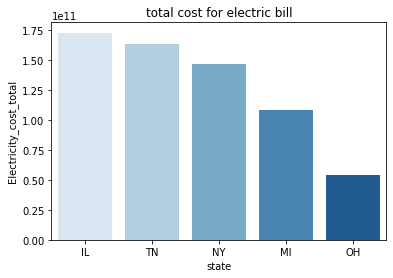

In [202]:
a=state_cost.sort_values('Electricity_cost_total',ascending=False).head()
#Creating bar plot
sns.barplot(x = 'state',y = 'Electricity_cost_total',data = a ,palette = "Blues")
#Adding the aesthetics
plt.title('total cost for electric bill')
plt.xlabel('state')
plt.ylabel('Electricity_cost_total') 
# Show the plot
plt.show()

## 地區前75%最佳的陽光發電度數/KW(千瓦)

In [203]:
##把要用的資料單獨挑出
kw_threshold = solar_observation[['state','county','yearly_sunlight_kwh_kw_threshold_avg']]
kw_threshold['state']=kw_threshold['state'].str.upper()
#並把同個州別的資料合併並加總電價
kw_threshold=kw_threshold.groupby('state').sum('yearly_sunlight_kwh_kw_threshold_avg')
kw_threshold=kw_threshold.drop_duplicates()
kw_threshold= kw_threshold.rename_axis('state').reset_index()
kw_threshold.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 2 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   state                                 41 non-null     object 
 1   yearly_sunlight_kwh_kw_threshold_avg  41 non-null     float64
dtypes: float64(1), object(1)
memory usage: 784.0+ bytes


In [204]:
fig2 = go.Figure(data=go.Choropleth(
    locations=kw_threshold['state'], # Spatial coordinates
    z = kw_threshold['yearly_sunlight_kwh_kw_threshold_avg'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'oranges',
    colorbar_title = "該地區前75%最佳的陽光發電度數/KW(千瓦)",
))

fig2.update_layout(
    title_text = "該地區前75%最佳的陽光發電度數/KW(千瓦)",
    geo_scope='usa', # limite map scope to USA
)

fig2.show()

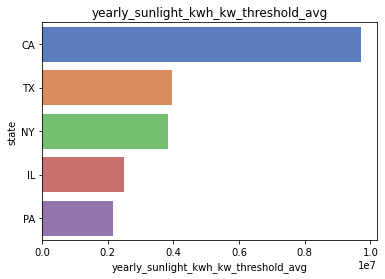

In [205]:
kw_threshold_bar=kw_threshold.sort_values('yearly_sunlight_kwh_kw_threshold_avg',ascending=False).head()
#Creating bar plot
sns.barplot(x = 'yearly_sunlight_kwh_kw_threshold_avg',y = 'state',data =kw_threshold_bar ,palette = "muted")
#Adding the aesthetics
plt.title('yearly_sunlight_kwh_kw_threshold_avg')
plt.xlabel('yearly_sunlight_kwh_kw_threshold_avg')
plt.ylabel('state') 
# Show the plot
plt.show()

"該地區前75%最佳的陽光發電度數/KW(千瓦)"
- `CA (California) 加州`
- `TX （Texas）德克薩斯州`
- `NY (Newyork) 紐約`
- `IL(Illinois)伊利諾州`
- `PA(Pennsylvania)賓夕法尼亞州`

In [206]:
#total_panel_area

##把要用的資料單獨挑出
panelarea = solar_observation[['state','county','total_panel_area']]
panelarea['state']=panelarea['state'].str.upper()
#並把同個州別的資料合併並加總電價
panelarea=panelarea.groupby('state').sum('total_panel_area')
panelarea=panelarea.drop_duplicates()
panelarea= panelarea.rename_axis('state').reset_index()
panelarea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   state             41 non-null     object 
 1   total_panel_area  41 non-null     float64
dtypes: float64(1), object(1)
memory usage: 784.0+ bytes


In [207]:
fig3 = go.Figure(data=go.Choropleth(
    locations=panelarea['state'], # Spatial coordinates
    z = panelarea['total_panel_area'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'sunset',
    colorbar_title = "太陽能電池板總面積（m ^ 2）",
))

fig3.update_layout(
    title_text = "太陽能電池板總面積（m ^ 2）",
    geo_scope='usa', # limite map scope to USA
)

fig3.show()

太陽能面板總面積最高的在加州

## 欄位相關係數

In [208]:
solar_observation.corr().style.background_gradient(cmap="Blues")


與Electricity_cost_total 的相關係數比較高的有 （但也沒有很高）....
- `lng_avg(平均經度)`：0.350986	
- `lon(緯度)`:0.351041 
- `frost_days(起霧天數)`：0.292670	
- `relative_humidity(相對濕度)`：0.282210


**這幾個欄位彼此有高度關聯 相關係數 至少都達到 `0.9`**
```
number_of_panels_n	bigint	該地區適合裝  朝向北方 太陽能板s(1.650m x 0.992m)的潛在數目 (# of) 
number_of_panels_s	bigint	該地區適合裝  朝向東方 太陽能板s(1.650m x 0.992m)的潛在數目 (# of)
number_of_panels_e	bigint	該地區適合裝  朝向南方 太陽能板s(1.650m x 0.992m)的潛在數目 (# of)
number_of_panels_w	bigint	該地區適合裝  朝向西方 太陽能板s(1.650m x 0.992m)的潛在數目 (# of)
number_of_panels_f	bigint	該地區適合裝  平裝 太陽能板s(1.650m x 0.992m)的潛在數目 (# of)
number_of_panels_median	double	該地區適合裝 中型太陽能板 的數目(#of)
number_of_panels_total	double	所有該地區太陽能板s(估1.650m x 0.992m)的潛在數目 (# of)
yearly_sunlight_kwh_n	double	該地區年度 朝向北方 太陽能發電總電量(千瓦)(度電)
yearly_sunlight_kwh_s	double	該地區年度 朝向南方 太陽能發電總電量(千瓦)(度電)
yearly_sunlight_kwh_e	double	該地區年度 朝向東方 太陽能發電總電量(千瓦)(度電)
yearly_sunlight_kwh_w	double	該地區年度 朝向西方 太陽能發電總電量(千瓦)(度電)
yearly_sunlight_kwh_f	double	該地區年度 平屋頂 太陽能發電總電量(千瓦)(度電)
```

## Conclusion
1. 電費消費最高的地區普遍分佈在美國東岸
2. `太陽能最佳發電度數` 和 `太陽能電板總面積` 最多的都分布在加州